In [25]:
# Lavie Ngo
# LRP1_upstream.py - sensitivity analysis 

# %%
from math import isclose
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Replace with Netflux files 
import LRP1_upstream as file
import LRP1_upstream_params as params

[speciesNames, tau, ymax, y0, w, n, EC50] = params.loadParams()

In [26]:
# Time span
tspan = [0, 700]

# Run default simulation to baseline
sol0 = solve_ivp(file.ODEfunc, tspan,  y0, args=(tau, ymax, w, n, EC50), t_eval=np.linspace(*tspan, 201))
sol0_SS = sol0.y[:,-1]

# Run simulation with perturbations to baseline
w_lrp1ag = 1
w_ros = 9

w[w_lrp1ag] = 1
w[w_ros] = 0.04

sol1 = solve_ivp(file.ODEfunc, tspan,  sol0_SS, args=(tau, ymax, w, n, EC50), t_eval=np.linspace(*tspan, 201))
sol1_SS = sol1.y[:,-1]

In [27]:
sol0_df = pd.DataFrame(sol0.y.T, index = sol0.t, columns = speciesNames).melt(var_name='species', value_name = 'activity', ignore_index= False).reset_index(names='time')
sol1_df = pd.DataFrame(sol1.y.T, index = sol1.t, columns = speciesNames).melt(var_name='species', value_name = 'activity', ignore_index= False).reset_index(names='time')
                       
# create new column to label condition
sol0_df['condition'] = 'base'
sol1_df['condition'] = 'LRP1ag, ROS'

# Here are the activity levels for each of your species for each condition
results = pd.concat([sol0_df, sol1_df])
display(results) # print df

# steady state values for each species
results_ss = results.query('time == @tspan[1]').reset_index().drop(columns=['time', 'index'])
display(results_ss)

,time,species,activity,condition
0,0.0,Akt,0.000000,base
1,3.5,Akt,0.305898,base
2,7.0,Akt,0.906269,base
3,10.5,Akt,0.993470,base
4,14.0,Akt,0.999637,base
...,...,...,...,...
13663,686.0,xIAPt,1.000000,"LRP1ag, ROS"
13664,689.5,xIAPt,1.000000,"LRP1ag, ROS"
13665,693.0,xIAPt,1.000000,"LRP1ag, ROS"
13666,696.5,xIAPt,1.000000,"LRP1ag, ROS"


,species,activity,condition
0,Akt,1.000000e+00,base
1,AP1,2.159135e-04,base
2,apoptosis,7.253541e-300,base
3,ASK1,2.109561e-02,base
4,Bad,2.159135e-04,base
...,...,...,...
131,Trxt,1.000000e+00,"LRP1ag, ROS"
132,VEGF,1.750000e-01,"LRP1ag, ROS"
133,VEGFR,1.353009e-01,"LRP1ag, ROS"
134,xIAP,1.000000e+00,"LRP1ag, ROS"


In [28]:
sol_kd0 = np.zeros([len(ymax), len(ymax)]) 
sol_kd1 = np.zeros([len(ymax), len(ymax)])
sens = np.zeros([len(ymax), len(ymax)])

deltaP = -1 # complete knockdown

# simulating knockdowns of each species, one by one
for i in range(0, len(ymax)):
    print('Knockdown #', str(i+1), 'of', str(len(ymax)))
    ymax_kd = ymax.copy()
    # ymax_new = new maximum values of each species AFTER KNOCKDOWN
    # ymax_new should all be 0's since we are doing a complete knockdown
    ymax_kd[i] = (1+deltaP)*ymax[i]

    # baseline 
    sol0_kd = solve_ivp(file.ODEfunc, tspan, sol0_SS, args=(tau, ymax_kd, w, n, EC50))
    sol0_kd_SS = sol0_kd.y[:,-1]

    # with perturbation
    w[w_lrp1ag] = 1
    w[w_ros] = 0.04

    sol1_kd = solve_ivp(file.ODEfunc, tspan, sol0_kd_SS, args=(tau, ymax_kd, w, n, EC50))
    sol1_kd_SS = sol1_kd.y[:,-1]

    # change in activity for each species (KD at steady state - baseline at steady state)
    # Normalized sensitivity
    #sens[:,i] = -(sol1_kd_SS-sol0_SS)/(ymax_kd[i]-ymax[i])*ymax[i]/(sol0_SS)
    sens[:,i] = sol1_kd_SS-sol0_SS


# if there are any non-real numbers, change them to 0 
for i in range(0,len(ymax)):
    for j in range(0, len(ymax)):
        if np.isnan(np.real(sens[i,j]==1)):
            sens[i,j] == 0

Knockdown # 1 of 68


/Volumes/SaucermanLab/Lavie/LRP1/Code/LRP1 Upstream Model/LRP1_upstream.py:150: RuntimeWarning: invalid value encountered in scalar power
  fact = w*(beta*x**n)/(K**n+x**n)


Knockdown # 2 of 68
Knockdown # 3 of 68
Knockdown # 4 of 68
Knockdown # 5 of 68
Knockdown # 6 of 68
Knockdown # 7 of 68
Knockdown # 8 of 68
Knockdown # 9 of 68
Knockdown # 10 of 68
Knockdown # 11 of 68
Knockdown # 12 of 68
Knockdown # 13 of 68
Knockdown # 14 of 68
Knockdown # 15 of 68
Knockdown # 16 of 68
Knockdown # 17 of 68
Knockdown # 18 of 68
Knockdown # 19 of 68
Knockdown # 20 of 68
Knockdown # 21 of 68
Knockdown # 22 of 68
Knockdown # 23 of 68
Knockdown # 24 of 68
Knockdown # 25 of 68
Knockdown # 26 of 68
Knockdown # 27 of 68
Knockdown # 28 of 68
Knockdown # 29 of 68
Knockdown # 30 of 68
Knockdown # 31 of 68
Knockdown # 32 of 68
Knockdown # 33 of 68
Knockdown # 34 of 68
Knockdown # 35 of 68
Knockdown # 36 of 68
Knockdown # 37 of 68
Knockdown # 38 of 68
Knockdown # 39 of 68
Knockdown # 40 of 68
Knockdown # 41 of 68
Knockdown # 42 of 68
Knockdown # 43 of 68
Knockdown # 44 of 68
Knockdown # 45 of 68
Knockdown # 46 of 68
Knockdown # 47 of 68
Knockdown # 48 of 68
Knockdown # 49 of 68


Text(226.97222222222223, 0.5, 'Measured Node Activity')

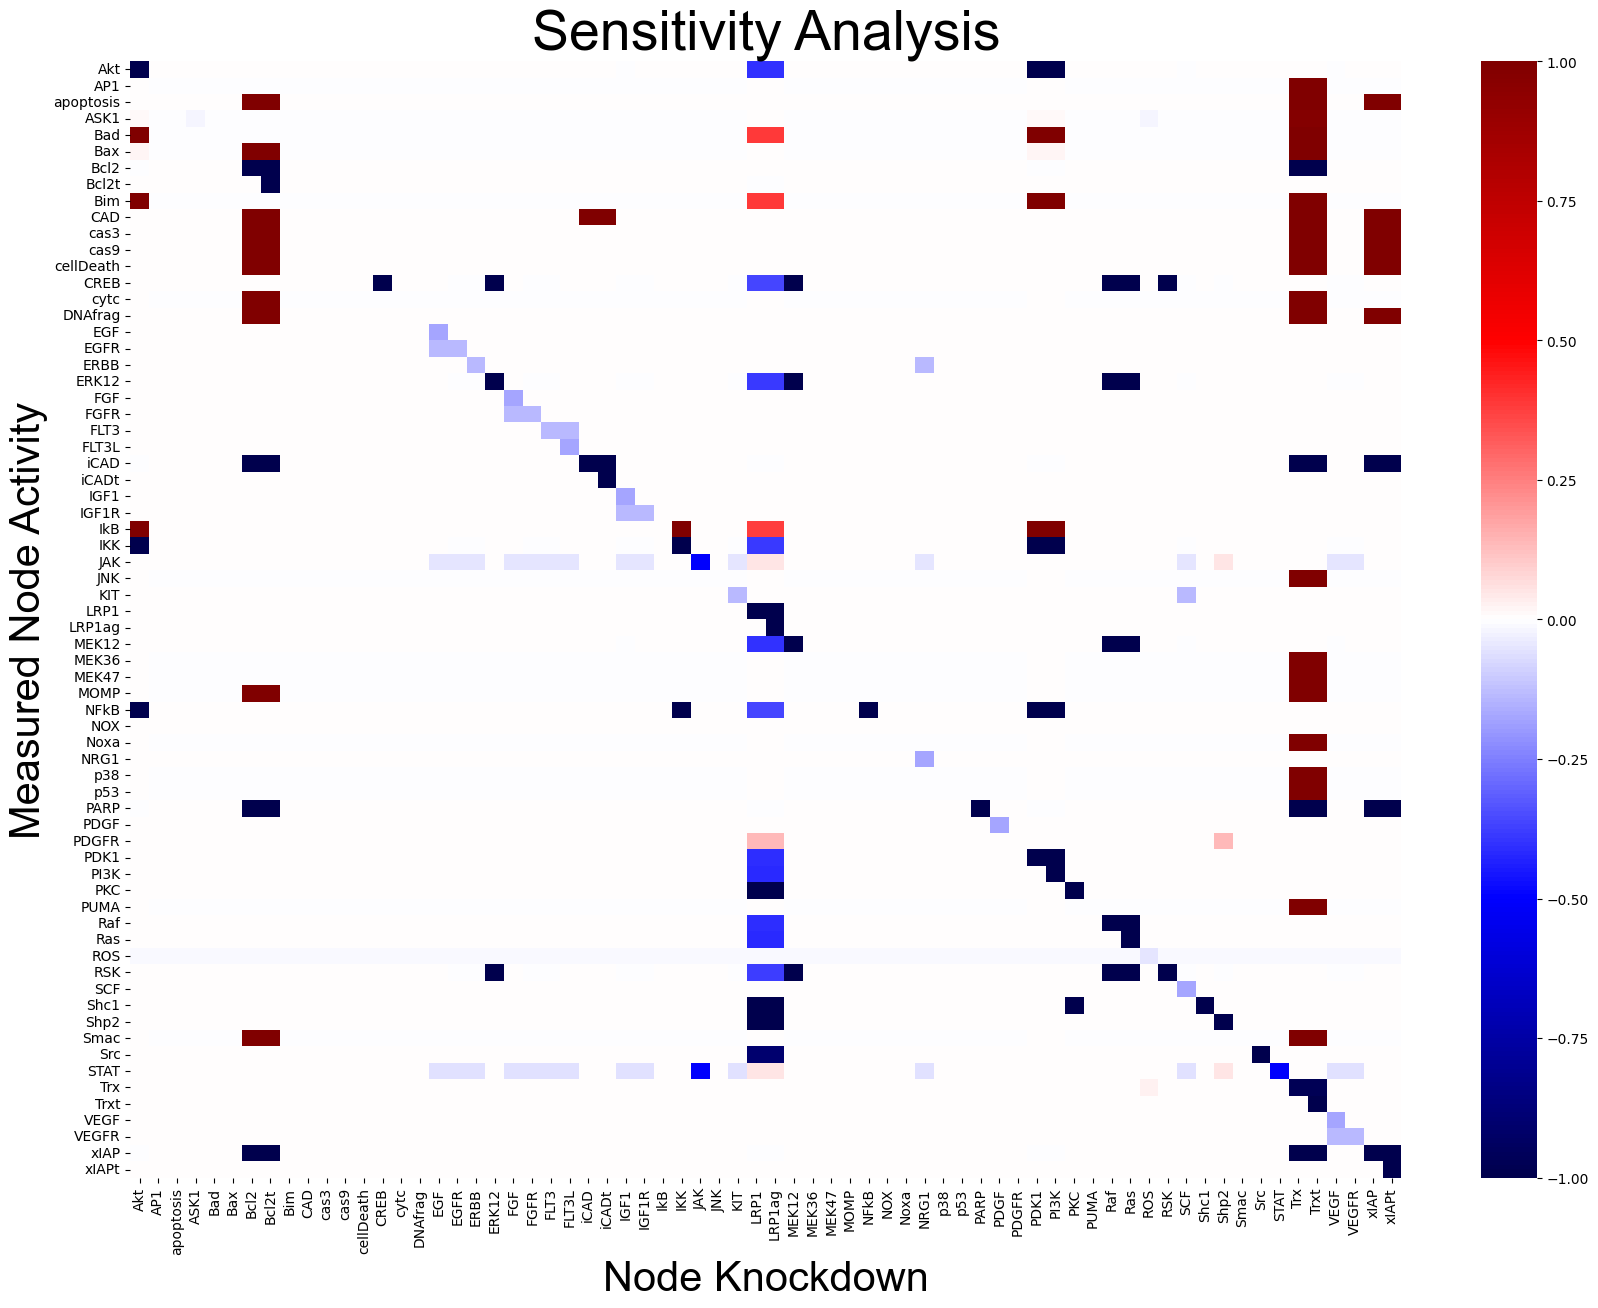

In [29]:
vcenter = 0
vmin, vmax = -1, 1 #sens_kd.min(), sens_kd.max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
#colormap = cm.RdBu_r
colormap = 'seismic'

sens_heatmap = pd.DataFrame(sens)
fig1, ax1 = plt.subplots()
fig1.set_size_inches(20.5, 14.5)
ax1 = sns.heatmap(sens_heatmap, norm=normalize, cmap=colormap, xticklabels=speciesNames, yticklabels=speciesNames)

font = {'fontname':'Arial'}
plt.title("Sensitivity Analysis", fontsize = 40, **font)
plt.xlabel("Node Knockdown", fontsize = 30, **font)
plt.ylabel("Measured Node Activity", fontsize=30, **font)

In [30]:
#sens_lrp1ag = sens_kd[:,[]]

Text(45.722222222222214, 0.5, 'Measured Node Activity')

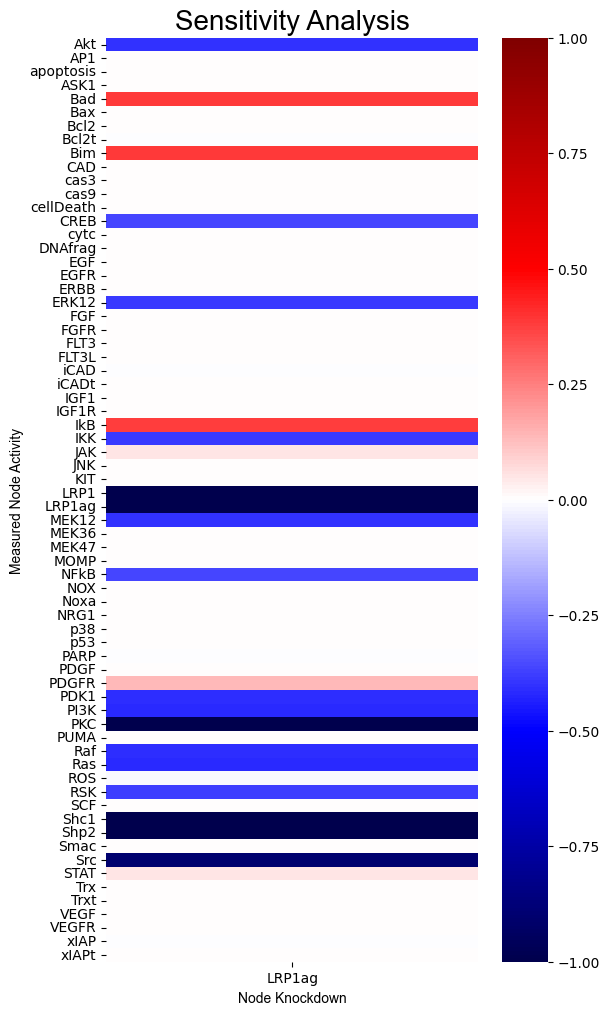

In [44]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(6,12)

# plot LRP1ag column against all species
LRP1ag_index = speciesNames.index('LRP1ag')
sens_lrp1ag = sens[:,LRP1ag_index]
ax2 = sns.heatmap(pd.DataFrame(sens_lrp1ag), norm=normalize, cmap=colormap, xticklabels=[speciesNames[LRP1ag_index]],yticklabels=speciesNames)

font = {'fontname':'Arial'}
plt.title("Sensitivity Analysis", fontsize = 20, **font)
plt.xlabel("Node Knockdown", fontsize = 10, **font)
plt.ylabel("Measured Node Activity", fontsize=10, **font)